# Récuperer les données nécessaires à l'optimisation

On execute la préparation données et la partie ML

['type_cnit', 'energ', 'marque_corr', 'modele_corr', 'nb_pl_ass', 'puis_fisc', 'min_year_circ', 'max_year_circ', 'mean_cylindree', 'mean_co2_theorique', 'mean_co2_theorique_corr', 'mean_co2_reel', 'mean_nb_decibels', 'mean_ptr', 'mean_ptac', 'mean_charge_utile', 'mean_puis_kw', 'sd_cylindree', 'sd_co2_theorique', 'sd_co2_theorique_corr', 'sd_co2_reel', 'sd_nb_decibels', 'sd_ptr', 'sd_ptac', 'sd_charge_utile', 'sd_puis_kw', 'N']
       mean_cylindree  mean_co2_theorique  mean_ptr  mean_charge_utile  \
0              4806.0          286.000000    4700.0         530.000000   
1              1598.0          147.000000    2895.0         455.628490   
3              1582.0          108.000000    3420.0         560.456938   
4                 NaN            0.000000       NaN         385.000000   
5                 NaN            0.000000       NaN         470.000000   
...               ...                 ...       ...                ...   
54158           998.0          127.086957    2830.

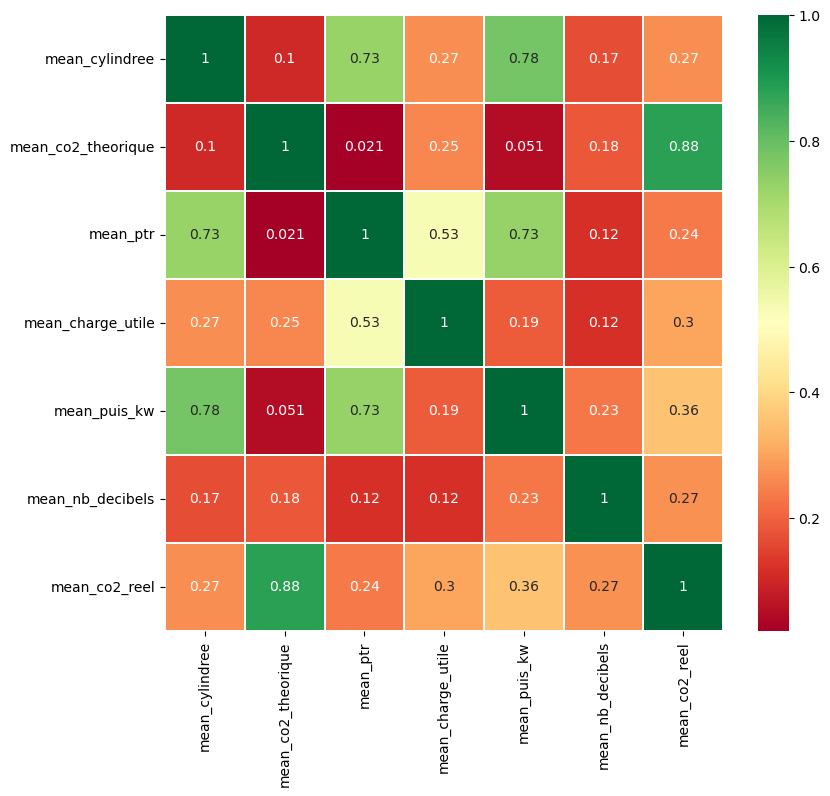

RMSE = 9.312
R2_score = 0.902
RMSE_model = 9.34
R2_score_model = 0.897
Les coefficients sont [-1.13895097e+00  2.45570543e+01  9.37476813e-01  1.21040709e+00
  1.04235848e+01  4.42050317e-01  2.63041027e+11  2.55735150e+11
  2.93249029e+10  1.51270425e+11  1.63402419e+11  1.54902375e+11
  3.85608143e+09  4.53852692e+10  3.75935228e+10  4.45701355e+10
  2.72669562e+09 -5.19831286e+10 -5.65568373e+10 -3.43759159e+10
 -1.36546124e+10 -2.03479599e+10 -1.73288511e+10 -1.08471259e+10
 -7.00381770e+09 -2.59909019e+09 -8.12141909e+09]
Le coefficient à l'origine est 154.72375668800234
28495     60.525225
49395    151.959551
40022     74.222034
34992    162.091503
11774    146.413032
Name: mean_co2_reel, dtype: float64
[ 74.07904627 157.10440637  80.20752527 153.32013513 153.31082012]
RMSE_th = 28.92
R2_score_th = 0.01


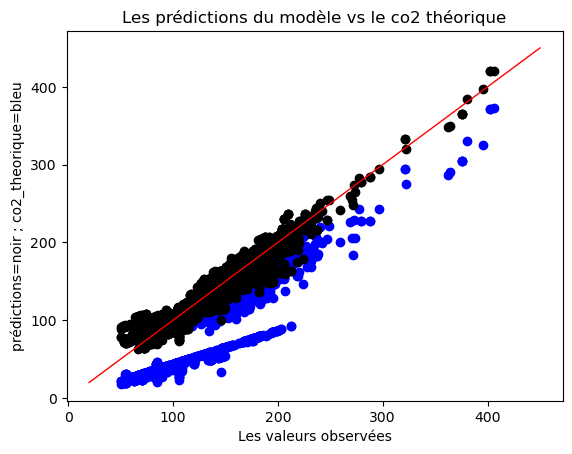

mean_cylindree        -1.138951e+00
mean_co2_theorique     2.455705e+01
mean_ptr               9.374768e-01
mean_charge_utile      1.210407e+00
mean_puis_kw           1.042358e+01
mean_nb_decibels       4.420503e-01
ES                     2.630410e+11
GO                     2.557352e+11
FE                     2.932490e+10
EE                     1.512704e+11
EH                     1.634024e+11
GH                     1.549024e+11
GN                     3.856081e+09
GL                     4.538527e+10
EG                     3.759352e+10
FH                     4.457014e+10
EN                     2.726696e+09
BERLINE               -5.198313e+10
TS TERRAINS/CHEMINS   -5.655684e+10
BREAK                 -3.437592e+10
MINIBUS               -1.365461e+10
MONOSPACE COMPACT     -2.034796e+10
COMBISPACE            -1.732885e+10
COUPE                 -1.084713e+10
MONOSPACE             -7.003818e+09
MINISPACE             -2.599090e+09
CABRIOLET             -8.121419e+09
dtype: float64
mean_co2_theo

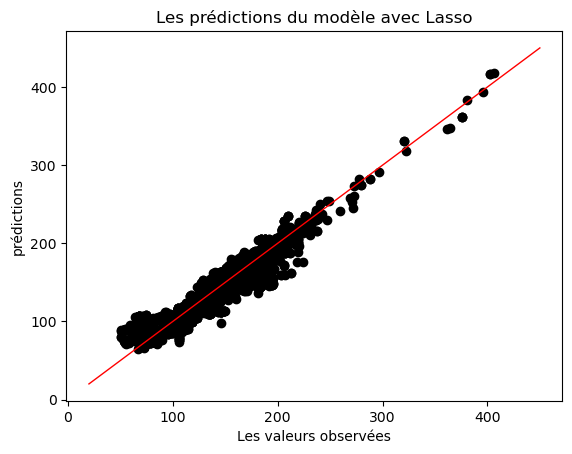

RMSE_model = 3.31
R2_score_model = 0.987


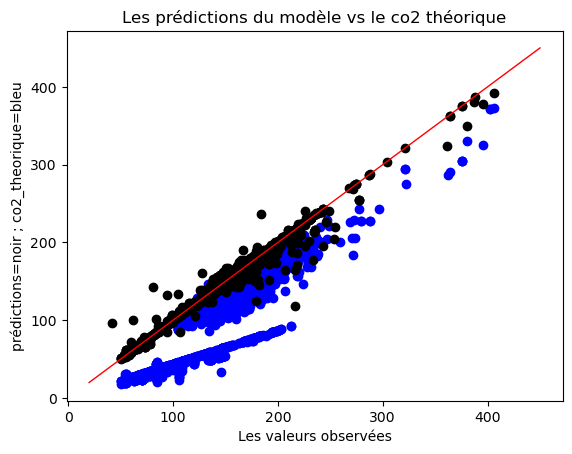

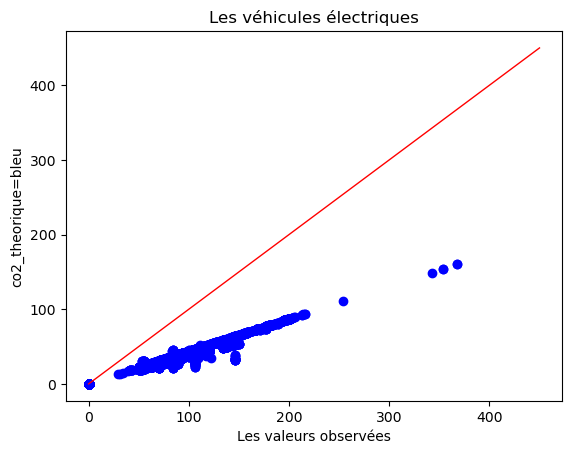

La taxe carbone perçue par l'État sur les nouveaux véhicules est de 17252500 euros
La taxe carbone qui serait perçue dans l'idéal par l'État sur les nouveaux véhicules est de 51785500 euros
La taxe carbone qui serait perçue avec notre indicateur par l'État sur les nouveaux véhicules est de 51275900 euros


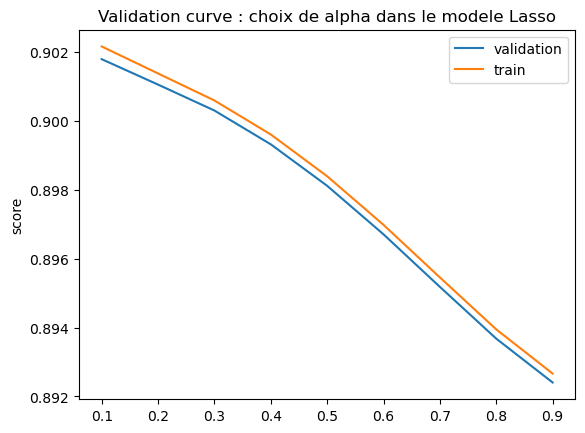

best score :  0.9017930761682269
best parameter :  {'alpha': 0.1}
mean_cylindree         -0.519145
mean_co2_theorique     24.862300
mean_ptr                0.504843
mean_charge_utile       1.326991
mean_puis_kw            9.909010
mean_nb_decibels        0.385863
ES                      3.367283
GO                     -1.262719
FE                      0.323042
GH                     -1.370272
GN                     -0.102389
GL                      0.705140
EG                     -0.551431
FH                      0.252827
EN                     -0.056888
TS TERRAINS/CHEMINS     0.782656
BREAK                  -0.429197
MINIBUS                 0.117075
MONOSPACE COMPACT      -0.054175
COMBISPACE              0.935128
COUPE                   0.056951
MONOSPACE               0.056912
CABRIOLET              -0.220349
dtype: float64
Index(['mean_cylindree', 'mean_co2_theorique', 'mean_ptr', 'mean_charge_utile',
       'mean_puis_kw', 'mean_nb_decibels', 'ES', 'GO', 'FE', 'EE', 'EH', 'GH',
 

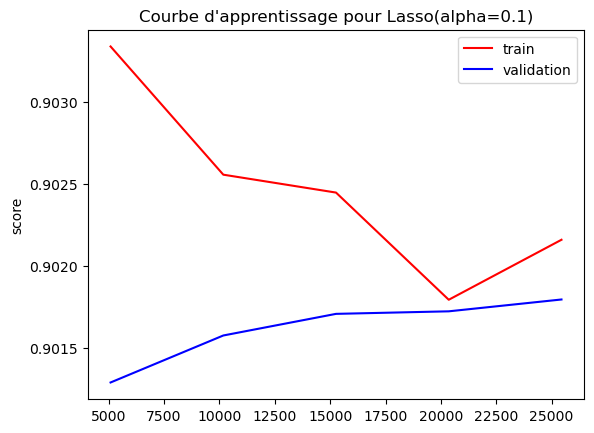

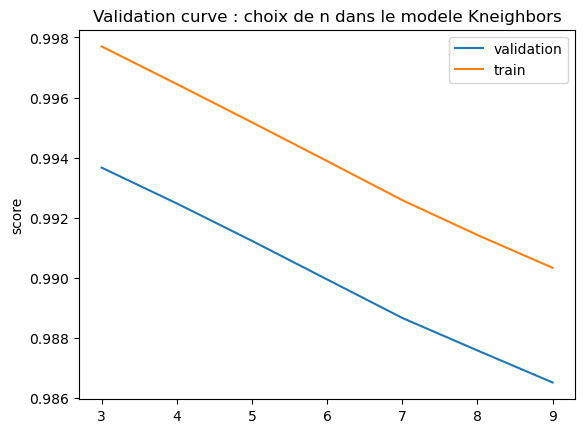

[ 5088 10177 15265 20354 25443]
[[0.97884404 0.97734824 0.97734824 0.97734824 0.97734824]
 [0.98893983 0.98852571 0.98850254 0.98850254 0.98850254]
 [0.99256022 0.99193821 0.99287176 0.99262863 0.99262863]
 [0.99371933 0.99347913 0.99398585 0.99456768 0.99440096]
 [0.99509286 0.99481191 0.99545727 0.99552105 0.99498774]]
[[0.9650148  0.96398917 0.96032264 0.96011805 0.96434669]
 [0.98125744 0.98089088 0.97961758 0.97808965 0.98087769]
 [0.98690259 0.98567981 0.9872845  0.98335777 0.98698275]
 [0.99024554 0.98857606 0.99030704 0.98618191 0.9898111 ]
 [0.99240619 0.99111072 0.99167072 0.98889743 0.99207175]]


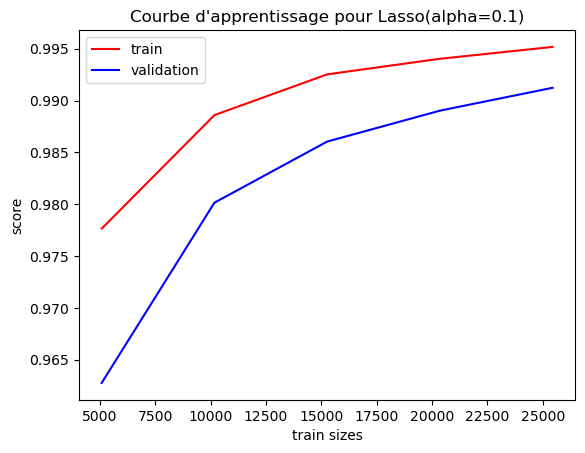

In [3]:
%run -i -e ./PSC_ML.ipynb --no output

In [18]:
# les données
CO2reel = lasso_model.predict(datap)
dataprix = data2['Prix du véhicule']
dataprix = dataprix.iloc[list(datap.index)]
data_opti = pd.DataFrame.from_dict({'prix':dataprix, 'CO2reel':CO2reel})
data_opti.dropna(inplace=True)

N = 70

Ce dont on a besoin :

 1. Diviser les données en N catégories selon leur émissions de CO2

 2. Récuperer dans une dataframe un vecteur de taille N 
     - une colonne 'prix' contenant les prix moyens de chaque catégorie
     - une colonne 'CO2' contenant l'emission de CO2 au moyenne au sein de la catégorie

In [19]:

# Determine the min and max values for 'Co2_prf'
co2_min, co2_max = data_opti['CO2reel'].min(), data_opti['CO2reel'].max()

# Create bins with a width of 10 units
bin_width = int (( co2_max - co2_min)/ N ) 
bins = range(int(co2_min), int(co2_max) + bin_width, bin_width)


In [20]:
# Bin the 'Co2_prf' data
data_opti['CO2bins'] = pd.cut(data_opti['CO2reel'], bins, right=False)

# Group by the new 'Co2_prf_bins' column and count the number of vehicles in each bin
price_by_bin = data_opti.groupby('CO2bins')['prix'].mean()

# Get the mean CO2 from each bin
meanCO2_by_bin = data_opti.groupby('CO2bins')['CO2reel'].mean()

In [21]:
data_opti

,prix,CO2reel,CO2bins
0,34000.0,333.006825,"[330, 335)"
1,39700.0,164.457001,"[160, 165)"
3,34000.0,125.889710,"[125, 130)"
6,39300.0,98.195191,"[95, 100)"
7,34000.0,121.312736,"[120, 125)"
...,...,...,...
54157,24900.0,150.077620,"[150, 155)"
54158,22920.0,150.077620,"[150, 155)"
54202,32478.0,150.157768,"[150, 155)"
54203,32478.0,150.157768,"[150, 155)"


In [22]:
price_by_bin

CO2bins
[65, 70)      40195.255814
[70, 75)      43443.684524
[75, 80)      47369.054878
[80, 85)      43726.389027
[85, 90)      49612.720971
                  ...     
[395, 400)             NaN
[400, 405)             NaN
[405, 410)             NaN
[410, 415)             NaN
[415, 420)    28492.000000
Name: prix, Length: 71, dtype: float64

In [9]:
data_opti['CO2bins']

0        [330, 335)
1        [160, 165)
3        [125, 130)
6         [95, 100)
7        [120, 125)
            ...    
54157    [150, 155)
54158    [150, 155)
54202    [150, 155)
54203    [150, 155)
54204    [150, 155)
Name: CO2bins, Length: 39755, dtype: category
Categories (71, interval[int64, left]): [[65, 70) < [70, 75) < [75, 80) < [80, 85) ... [400, 405) < [405, 410) < [410, 415) < [415, 420)]

## Les variables finales qu'on va utiliser dans notre fonction minimize : p et CO2reel

Le vecteur prix

In [28]:
p= data_opti.groupby('CO2bins')['prix'].mean()
p.dropna(inplace=True)

In [29]:
p

CO2bins
[65, 70)      40195.255814
[70, 75)      43443.684524
[75, 80)      47369.054878
[80, 85)      43726.389027
[85, 90)      49612.720971
                  ...     
[365, 370)    32251.400000
[375, 380)    81490.000000
[380, 385)    26418.000000
[390, 395)    57350.000000
[415, 420)    28492.000000
Name: prix, Length: 61, dtype: float64

Le vecteur CO2reel

In [30]:
CO2reel = data_opti.groupby('CO2bins')['CO2reel'].mean()
CO2reel.dropna(inplace=True)

In [31]:
CO2reel

CO2bins
[65, 70)       66.925721
[70, 75)       73.159991
[75, 80)       77.357525
[80, 85)       83.142718
[85, 90)       87.484099
                 ...    
[365, 370)    368.559453
[375, 380)    378.791268
[380, 385)    383.031489
[390, 395)    393.231420
[415, 420)    417.048897
Name: CO2reel, Length: 61, dtype: float64